In [125]:
import argparse
from f0poly_sols_clean import f0_lambda_neq_0, f0_lambda_eq_0, f_i
from scipy.optimize import bisect, newton, curve_fit
from subprocess import call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from package_global_functions import *

def compute_R_sq(funct, popt, xdata, ydata):
    residuals = ydata- funct(xdata, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

### Weber law; the stimulus is the quality; fix q2 and search q1

In [2]:
def consensus_usual_eq_q1(q1, pi1, pi2, l, q2, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

# def consensus_mod2_eq(l, pi1, pi2, q1, q2, x, mu):
def consensus_mod2_eq_q1(q1, pi1, pi2, l, q2, x, mu):
    'modification to consensus mod, max(f0, x*f1) instead of x*max(f0,f1)'
    'equation to ve solved numerically'
    _, f0, _  = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - max(f0, x*f1)

# def consensus_f2_eq(l, pi1, pi2, q1, q2, x, mu):
def consensus_f2_eq_q1(q1, pi1, pi2, l, q2, x, mu):
    'modified definition of consensus, just considering f2 greater than a threshold'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x/(x+1)

0.1 [1.2642478923498857, 1.5495035344745247, 1.838795312631646, 2.1309719246439727, 2.425260735935808, 2.721131484673265, 5.7184120790622615, 8.738545140944268, 11.764705882351933, 14.793302624172355, 17.823120611813323]
0.3 [2.000000000001819, 2.4864021567370855, 2.9751306576276875, 3.4649782447993402, 3.955398440875797, 4.446124860953546, 9.356569067550993, 14.266843919017049, 19.176651920204307, 24.086211403316526, 28.995630254236204]
0.6 [3.3442675696696824, 4.087224841755187, 4.827261519827061, 5.565519950573844, 6.3026203444769635, 7.038926205504936, 14.385170355747675, 21.722635312281852, 29.05800205269648, 36.39254507364015, 43.72668055576739]
0.9 [4.6149756340837484, 5.5564641514681625, 6.49695065970036, 7.436861847706268, 8.376412328145307, 9.315721801618224, 18.70391637593542, 28.089645324935702, 37.47480366736178, 46.85974053090675, 56.244568473659996]


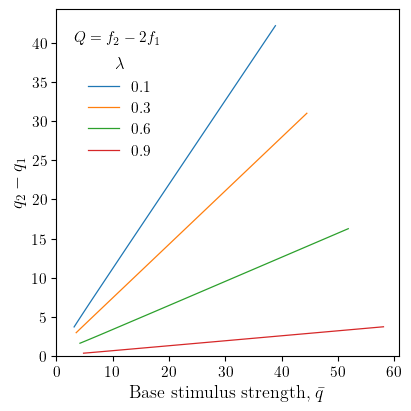

In [26]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

consensus_eq = consensus_usual_eq_q1
Qlabel = 'Q'

# consensus_eq = consensus_f2_eq_q1
# Qlabel = 'f2'

# consensus_eq = consensus_mod2_eq_q1
# Qlabel = 'Qmod2'


# q2s = [2.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 100.0, 200.0]
q2s = [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]

ls = [0.1, 0.3, 0.6, 0.9]
# ls = [0.6, 0.9]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [1.0,q2]
        # if np.sign(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu)) != np.sign(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu)):
        # print(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu))
        # print(consensus_eq(q1_solve_lims[1], pi1, pi2, l, q2, x, mu))
        # q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
        # q1s.append(q1)
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(float('nan'))
    print(l, q1s)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None), xlim=(0,None))
fig.legend(title='$\lambda$', frameon=False, fontsize=11, title_fontsize=12, loc=(0.2, 0.6))

QtextPos = (0.17, 0.91)
if Qlabel == 'Q':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - 2 f_1$', fontsize=11)
elif Qlabel == 'Qmod2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - max(f_0, 2 f_1)$', fontsize=11)
elif Qlabel == 'f2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - f_2^{th}$', fontsize=11)


# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')
fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.pdf')


[(9.048399633204996, 10), (13.636363636363921, 15), (18.2219035047404, 20), (22.806527208183123, 25), (27.39070710669751, 30), (31.974638522531812, 35), (36.55841684071821, 40), (41.14209416953, 45), (45.725701381520054, 50), (50.309257930220596, 55), (54.892776682444165, 60), (59.4762664883274, 65)]
[0.09991394396578947, 0.09523809523807442, 0.0930407087150474, 0.09176457358071458, 0.09093085012705782, 0.09034349551436209, 0.08990737534299056, 0.0895707462806172, 0.08930305146461123, 0.08908508448302914, 0.08890416725973738, 0.08875159365726291]
For the computed q1s: m = 0.08678428688784579, n = 0.12069736031105549, R^2 = 0.9999986054402558
For the computed q1s (powerLaw): a = 0.9584151317180264, b = 0.10504210426510077
For the computed q1s (line): a = 0.08955836780018019, R^2 = 0.9987596666261189
For the ideal q1s: m = 0.35294117647058826, n = 0.0, R^2 = 1.0


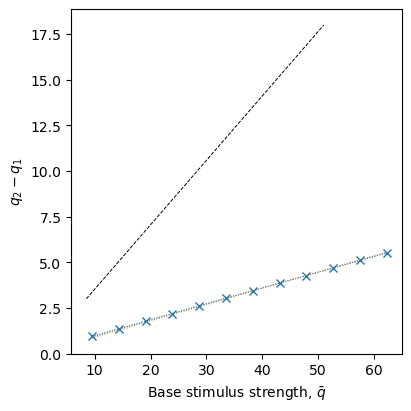

In [70]:
from scipy.stats import linregress

consensus_eq = consensus_usual_eq_q1
# q2s = [10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0]
q2s = np.arange(10,70,5)
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0
# l = 0.5
l = 0.2142857142851537 # so that I expect 7.0,10.0
l = 0.6

q1s = []
for q2 in q2s:
    q1_solve_lims = [1.0,q2-0.001]
    q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
    q1s.append(q1)
print([(q1,q2) for q1,q2 in zip(q1s,q2s)])
print([(q2-q1)/((q2+q1)/2) for q1,q2 in zip(q1s,q2s)])

fig, ax = plt.subplots(1,1, figsize=(4,4),constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
# base stimulus strenght:
bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
# quality difference:
delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
line, = ax.plot(bss, delta_q, lw=0.0, marker='x', label=f'{l}')
res = linregress(bss, delta_q)
print(f'For the computed q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
ax.plot(bss, [b*res[0]+res[1] for b in bss], color=line.get_color(), ls=':', lw=0.7)

# fit to a power law:
def powerLaw(x,a,b):
    return b*x**a

popt, _ = curve_fit(powerLaw, bss, delta_q)
ax.plot(bss, powerLaw(bss, popt[0], popt[1]), color=line.get_color(), ls=':', lw=0.7)
print(f'For the computed q1s (powerLaw): a = {popt[0]}, b = {popt[1]}')

# fit to straight line with no y-intercept:
def linee(x,a):
    return a*x

popt, pcov = curve_fit(linee, bss, delta_q)
residuals = delta_q - linee(bss, popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((delta_q-np.mean(delta_q))**2)
r_squared = 1- (ss_res/ss_tot)
ax.plot(bss, linee(bss, popt), ls=':', lw=0.7)
print(f'For the computed q1s (line): a = {popt[0]}, R^2 = {r_squared}')


#ideal:
base_q_pair = (7.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,7)]
# q_pairs.append((70.0,100.0))
bss = [(q2+q1)/2 for q1,q2 in q_pairs]
delta_q = [(q2-q1) for q1,q2 in q_pairs]
ax.plot(bss, delta_q, lw=0.7, ls='--', color='k')
res = linregress(bss, delta_q)
print(f'For the ideal q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
# ax.set_xlim(40,60)
# fig.savefig('test_weber_law_q1_7_q2_10.png')

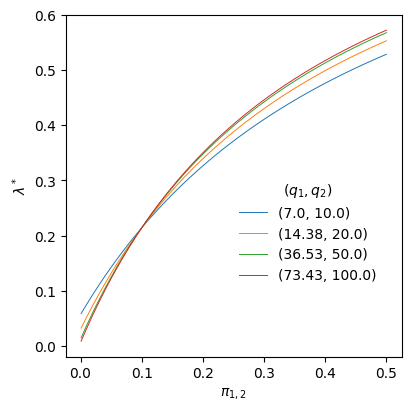

In [87]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
# q_pairs = [(8.67, 10.0), (17.53, 20.0), (88.31, 100.0)]
q_pairs = [(7.0, 10.0), (14.38, 20.0), (36.53,50.0), (73.43, 100.0)]

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

x=2
for q_pair in q_pairs:
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi'], tline['lambda'], lw=0.7, label=f'{q_pair}')
ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda^*$')
ax.legend(title='$(q_1, q_2)$', frameon=False, loc=(0.5, 0.2))
fig.savefig(f'test_weber_law_QTlines_sym_pi_search_q1_fix_q2_start_from_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

## What if we fix q1 and search q2...

In [81]:
def consensus_usual_eq(q2, pi1, pi2, l, q1, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

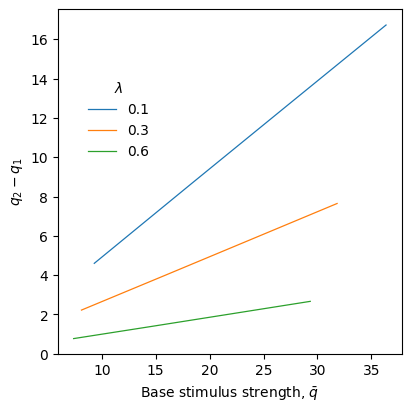

In [83]:
consensus_eq = consensus_usual_eq
Qlabel = 'Q'
# consensus_eq = consensus_f2_eq
# consensus_eq = consensus_usual_eq


q1s = [7.0, 14.0, 21.0, 28.0]

ls = [0.1, 0.3, 0.6]
# ls = [0.1, ]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q2s = []
    for q1 in q1s:
        q2_solve_lims = [q1,3*q1]
        q2 = bisect(consensus_eq, q2_solve_lims[0], q2_solve_lims[1], args=(pi1, pi2, l, q1, x, mu))
        q2s.append(q2)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None))
fig.legend(title='$\lambda$', frameon=False, loc=(0.2, 0.6))
fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q1_search_q2.png')

## Limit of very small pi; non linear?

0.6 [1.6372297122597956, 2.590335317325298, 3.5236196131850193, 4.4492935008911445, 5.371544436761496, 6.291996932604434, 7.211394602634982, 8.130122624925207, 9.048399633204895]
0.9 [1.9329379909158888, 2.925636949688851, 3.9124844024022423, 4.897844027755127, 5.882607568926005, 6.867073154731315, 7.851368585013688, 8.835557734581016, 9.819676070378478]


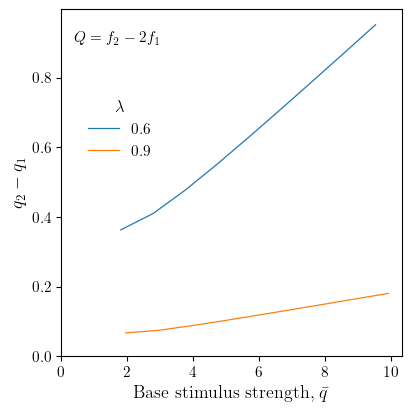

In [84]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)

consensus_eq = consensus_usual_eq_q1
Qlabel = 'Q'

# consensus_eq = consensus_f2_eq_q1
# Qlabel = 'f2'

# consensus_eq = consensus_mod2_eq_q1
# Qlabel = 'Qmod2'


q2s = np.arange(2.0, 11.0, 1.0)

ls = [0.1, 0.3, 0.6, 0.9]
ls = [0.6, 0.9]
# ls = [0.6, 0.9]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [1.0,q2]
        # if np.sign(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu)) != np.sign(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu)):
        # print(consensus_eq(q1_solve_lims[0], pi1, pi2, l, q2, x, mu))
        # print(consensus_eq(q1_solve_lims[1], pi1, pi2, l, q2, x, mu))
        # q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
        # q1s.append(q1)
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(float('nan'))
    print(l, q1s)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None), xlim=(0,None))
fig.legend(title='$\lambda$', frameon=False, fontsize=11, title_fontsize=12, loc=(0.2, 0.6))

QtextPos = (0.17, 0.91)
if Qlabel == 'Q':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - 2 f_1$', fontsize=11)
elif Qlabel == 'Qmod2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - max(f_0, 2 f_1)$', fontsize=11)
elif Qlabel == 'f2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - f_2^{th}$', fontsize=11)

fig.savefig(f'weber_law_sym_pi_{pi1}_small_q2s_nonlinear.pdf')

## Testing Weber's law but the stimulis is pi

In [29]:
def consensus_usual_eq_pi1(pi1, pi2, l, q1, q2, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

def consensus_mod2_eq_pi1(pi1, pi2, l, q1, q2, x, mu):
    'modification to consensus mod, max(f0, x*f1) instead of x*max(f0,f1)'
    'equation to ve solved numerically'
    _, f0, _  = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - max(f0, x*f1)

0.1 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]
0.3 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]
0.6 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]
0.9 [0.050000000000727594, 0.10000000000007277, 0.15000000000069122, 0.19999999999865395, 0.2500000000008368]


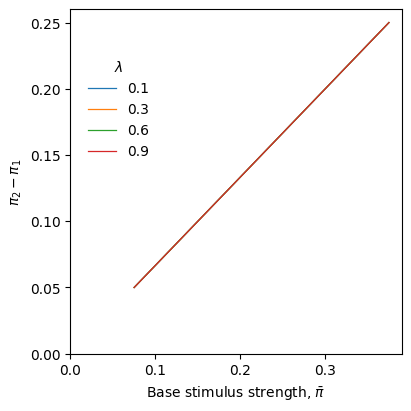

In [11]:
# consensus_eq = consensus_usual_eq_pi1
Qlabel = 'Q'
# consensus_eq = consensus_f2_eq_pi1
consensus_eq = consensus_mod2_eq_pi1

pi2s = [0.1, 0.2, 0.3, 0.4, 0.5]

ls = [0.1, 0.3, 0.6, 0.9]
# ls = [0.6, 0.9]
q1, q2, x, mu = 10.0, 10.0, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{\pi}$', ylabel='$\pi_2 - \pi_1$')
for l in ls:
    pi1s = []
    for pi2 in pi2s:
        pi1_solve_lims = [0.01,pi2]
        try:
            pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
            pi1s.append(pi1)
        except ValueError:
            pi1s.append(float('nan'))
    # base stimulus strenght:
    print(l, pi1s)
    bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
    # bss = q2s
    # quality difference:
    delta_pi = [(pi2-pi1) for pi1,pi2 in zip(pi1s,pi2s)]
    ax.plot(bss, delta_pi, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None), xlim=(0,None))
fig.legend(title='$\lambda$', frameon=False, loc=(0.2, 0.6))
# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')


[(0.19314850101847697, 0.3), (0.1929907253314377, 0.4), (0.19283445714736447, 0.5)]
[0.43334410937414397, 0.6981872256192861, 0.8866924549836644]
For the computed pi1s: m = 2.006290755211854, n = -0.38784763699338787, R^2 = 0.9999999999242475
For the computed pi1s (powerLaw): a = 2.9287126231186247, b = 6.928261900964233
For the computed pi1s (line): a = 0.7224487411655557, R^2 = 0.5827784646467449


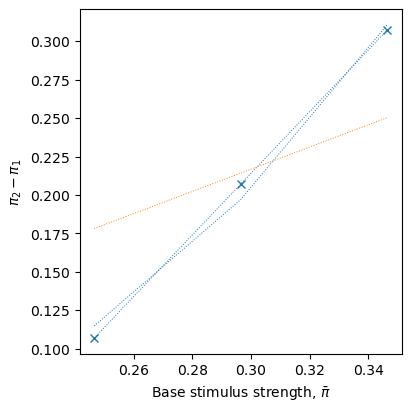

In [76]:
from scipy.stats import linregress

consensus_eq = consensus_usual_eq_q1
pi2s = [0.3, 0.4, 0.5]
q1, q2 = 7.0, 10.0
x, mu = 2, 0.0
l = 0.3

pi1s = []
for pi2 in pi2s:
    pi1_solve_lims = [0.01,pi2]
    try:
        pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
        pi1s.append(pi1)
    except ValueError:
        pi1s.append(float('nan'))
print([(pi1,pi2) for pi1,pi2 in zip(pi1s,pi2s)])
print([(pi2-pi1)/((pi2+pi1)/2) for pi1,pi2 in zip(pi1s,pi2s)])

fig, ax = plt.subplots(1,1, figsize=(4,4),constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{\pi}$', ylabel='$\pi_2 - \pi_1$')
# base stimulus strenght:
bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
# quality difference:
delta_pi = [(pi2-pi1) for pi1,pi2 in zip(pi1s,pi2s)]
line, = ax.plot(bss, delta_pi, lw=0.0, marker='x', label=f'{l}')
res = linregress(bss, delta_pi)
print(f'For the computed pi1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
ax.plot(bss, [b*res[0]+res[1] for b in bss], color=line.get_color(), ls=':', lw=0.7)

# fit to a power law:
def powerLaw(x,a,b):
    return b*x**a

popt, _ = curve_fit(powerLaw, bss, delta_pi)
ax.plot(bss, powerLaw(bss, popt[0], popt[1]), color=line.get_color(), ls=':', lw=0.7)
print(f'For the computed pi1s (powerLaw): a = {popt[0]}, b = {popt[1]}')

# fit to straight line with no y-intercept:
def linee(x,a):
    return a*x

popt, pcov = curve_fit(linee, bss, delta_pi)
residuals = delta_pi - linee(bss, popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((delta_pi-np.mean(delta_pi))**2)
r_squared = 1- (ss_res/ss_tot)
ax.plot(bss, linee(bss, popt), ls=':', lw=0.7)
print(f'For the computed pi1s (line): a = {popt[0]}, R^2 = {r_squared}')


#ideal:
# base_pi_pair = (7.0, 10.0)
# q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,7)]
# # q_pairs.append((70.0,100.0))
# bss = [(q2+q1)/2 for q1,q2 in q_pairs]
# delta_q = [(q2-q1) for q1,q2 in q_pairs]
# ax.plot(bss, delta_q, lw=0.7, ls='--', color='k')
# res = linregress(bss, delta_q)
# print(f'For the ideal q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')

## Figure for the paper

### Including pi as stimulus; finally I'm discarding this option

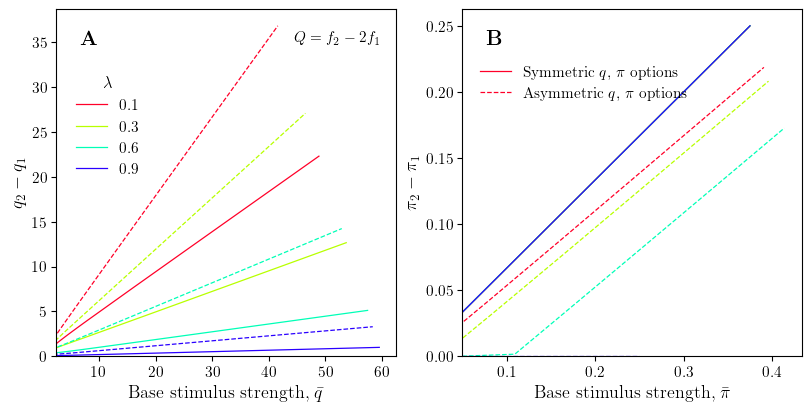

In [53]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
x, mu = 2, 0.0
ls = [0.1, 0.3, 0.6, 0.9]
ls_colors = plt.cm.gist_rainbow(np.linspace(0,0.8,len(ls)))
Qlabel = 'Q'

# LEFT Quality is the stimulus:
ax[0].set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
consensus_eq = consensus_usual_eq_q1
q2s = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]

pi1, pi2 = 0.1, 0.1
for l,lc in zip(ls,ls_colors):
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [0.5,q2]
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(0.0)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # quality difference:
    delta_q = [(q2-q1) if q1>0.0 else 0.0 for q1,q2 in zip(q1s,q2s)]
    ax[0].plot(bss, delta_q, lw=0.9, color=lc, label=f'{l}')

pi1, pi2 = 0.25, 0.15
for l,lc in zip(ls,ls_colors):
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [0.5,q2]
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(float('nan'))
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # quality difference:
    delta_q = [(q2-q1) if q1>0.0 else 0.0 for q1,q2 in zip(q1s,q2s)]
    ax[0].plot(bss, delta_q, color=lc, lw=0.9, ls = '--')
# ax[0].set(ylim=(0,None), xlim=(0,None))
ax[0].set(ylim=(0.0,None), xlim=(2.5,None))



# LEFT Pi is the stimulus:
ax[1].set(xlabel=r'Base stimulus strength, $\bar{\pi}$', ylabel='$\pi_2 - \pi_1$')
consensus_eq = consensus_usual_eq_pi1

pi2s = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
# pi2s = np.arange(0.04, 0.52, 0.02)

q1, q2  = 10.0, 10.0
for l,lc in zip(ls,ls_colors):
    pi1s = []
    for pi2 in pi2s:
        pi1_solve_lims = [0.01,pi2]
        try:
            pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
            pi1s.append(pi1)
        except ValueError:
            # pi1s.append(float('nan'))
            pi1s.append(0.0)
    # base stimulus strenght:
    bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
    # bss = q2s
    # quality difference:
    delta_pi = [(pi2-pi1) if pi1>0.0 else 0.0 for pi1,pi2 in zip(pi1s,pi2s)]
    if l == 0.1:
        # ax[1].plot(bss, delta_pi, lw=0.9, label=f'$(q_1, q_2) = ({q1},{q2})$')
        ax[1].plot(bss, delta_pi, lw=0.9, color=lc, label=f'Symmetric $q$, $\pi$ options')
    else:
        ax[1].plot(bss, delta_pi, lw=0.9, color=lc)

q1, q2  = 9.0, 10.0
for l,lc in zip(ls,ls_colors):
    if l == 0.6:
        pi2s = np.arange(0.04, 0.51, 0.01)
    else:
        pi2s = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    pi1s = []
    for pi2 in pi2s:
        pi1_solve_lims = [0.01,pi2]
        try:
            pi1 = bisect(consensus_eq, pi1_solve_lims[0], pi1_solve_lims[1], args=(pi2, l, q1, q2, x, mu))
            pi1s.append(pi1)
        except ValueError:
            # pi1s.append(float('nan'))
            pi1s.append(0.0)
    # base stimulus strenght:
    bss = [(pi2+pi1)/2 for pi1,pi2 in zip(pi1s,pi2s)]
    # bss = q2s
    # quality difference:
    delta_pi = [(pi2-pi1) if pi1>0.0 else 0.0 for pi1,pi2 in zip(pi1s,pi2s)]
    # print(l, delta_pi)
    if l == 0.1:
        # ax[1].plot(bss, delta_pi, lw=0.9, label=f'$(q_1, q_2) = ({q1},{q2})$')
        ax[1].plot(bss, delta_pi, lw=0.9, ls='--', color=lc, label=f'Asymmetric $q$, $\pi$ options')
    else:
        ax[1].plot(bss, delta_pi, lw=0.9, ls='--', color=lc)
# ax[1].set(ylim=(0,None), xlim=(0,None))
ax[1].set(ylim=(0.0,None), xlim=(0.05,None))



QtextPos = (0.36, 0.91)
if Qlabel == 'Q':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - 2 f_1$', fontsize=11)
elif Qlabel == 'Qmod2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - max(f_0, 2 f_1)$', fontsize=11)
elif Qlabel == 'f2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - f_2^{th}$', fontsize=11)

ax[0].legend(title='$\lambda$', frameon=False, fontsize=11, title_fontsize=12, loc=(0.04, 0.5))
ax[1].legend(frameon=False, fontsize=11, title_fontsize=12, loc=(0.035, 0.72))

ax[0].text(0.07,0.9, r'$\textbf{A}$', transform=ax[0].transAxes)
ax[1].text(0.07,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)

# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')
# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.pdf')
fig.savefig('weber_law_provisional.pdf')

l = 0.1, line with n=0: slope = 0.46197332730403734, R^2 = 0.9985225636084768
l = 0.1, power law; a = 0.946845640600278+-0.004673189701863506, b = 0.5585228356292394
l = 0.3, line with n=0: slope = 0.2398397606389558, R^2 = 0.9954642892083535
l = 0.3, power law; a = 0.913981277970274+-0.01089396502365647, b = 0.3286127692998477
l = 0.6, line with n=0: slope = 0.09023459647712513, R^2 = 0.9959811153538316
l = 0.6, power law; a = 0.9216127500521999+-0.011908095930990698, b = 0.1208646424373133
l = 0.9, line with n=0: slope = 0.016754760185524114, R^2 = 0.9974171328905501
l = 0.9, power law; a = 0.9365526577821782+-0.009847492018055917, b = 0.021275193158092356
l = 0.1, (line with n=0): slope = 1.047900621670703, R^2 = 0.9979897337334396
l = 0.1, power law; a = 0.9373356533974095+-0.004759164799643834, b = 1.2935609455967603
l = 0.3, (line with n=0): slope = 0.5693614922825949, R^2 = 0.9943159548504332
l = 0.3, power law; a = 0.9038202889830131+-0.012443298485528805, b = 0.799356322280697

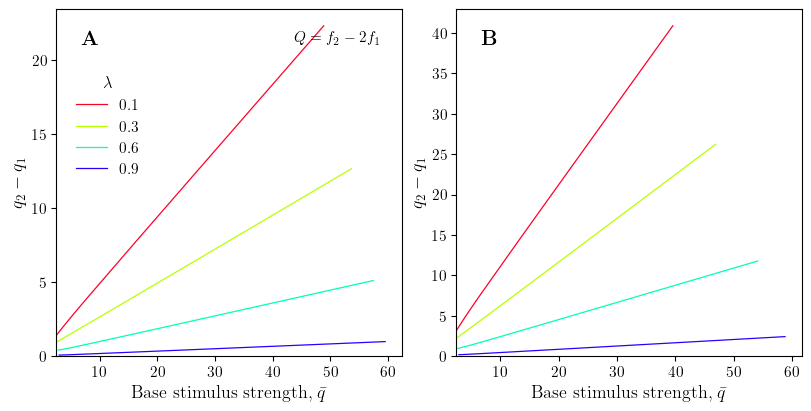

In [89]:
latexFont(titlesize=11, ticklabelssize=11, labelsize=13)
fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
x, mu = 2, 0.0
ls = [0.1, 0.3, 0.6, 0.9]
ls_colors = plt.cm.gist_rainbow(np.linspace(0,0.8,len(ls)))
Qlabel = 'Q'

# fit to straight line with no y-intercept:
def linee(x,a):
    return a*x

# fit power law
def powerLaw(x,a,b):
    return b*x**a

# LEFT Quality is the stimulus, sym pis:
ax[0].set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
ax[1].set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
consensus_eq = consensus_usual_eq_q1

# q2s = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]
q2s = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0]

pi1, pi2 = 0.1, 0.1
for l,lc in zip(ls,ls_colors):
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [0.5,q2]
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(0.0)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # quality difference:
    delta_q = [(q2-q1) if q1>0.0 else 0.0 for q1,q2 in zip(q1s,q2s)]
    ax[0].plot(bss, delta_q, lw=0.9, color=lc, label=f'{l}')
    # straight line with no intercept:
    popt, pcov = curve_fit(linee, bss, delta_q)
    rsq = compute_R_sq(linee, popt, bss, delta_q)
    print(f'l = {l}, line with n=0: slope = {popt[0]}, R^2 = {rsq}')
    # fit power law:
    popt, pcov = curve_fit(powerLaw, bss, delta_q)
    perr = np.sqrt(np.diag(pcov))
    print(f'l = {l}, power law; a = {popt[0]}+-{perr[0]}, b = {popt[1]}')


# RIGHT: quality is the stimulus, asym pis:
pi1, pi2 = 0.15, 0.05
for l,lc in zip(ls,ls_colors):
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [0.5,q2]
        try:
            q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
            q1s.append(q1)
        except ValueError:
            q1s.append(float('nan'))
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # quality difference:
    delta_q = [(q2-q1) if q1>0.0 else 0.0 for q1,q2 in zip(q1s,q2s)]
    ax[1].plot(bss, delta_q, color=lc, lw=0.9)
    # straight line with no intercept:
    popt, pcov = curve_fit(linee, bss, delta_q)
    rsq = compute_R_sq(linee, popt, bss, delta_q)
    print(f'l = {l}, (line with n=0): slope = {popt[0]}, R^2 = {rsq}')
    # fit power law:
    popt, pcov = curve_fit(powerLaw, bss, delta_q)
    perr = np.sqrt(np.diag(pcov))
    print(f'l = {l}, power law; a = {popt[0]}+-{perr[0]}, b = {popt[1]}')


# ax[0].set(ylim=(0,None), xlim=(0,None))
ax[0].set(ylim=(0.0,None), xlim=(2.5,None))
ax[1].set(ylim=(0.0,None), xlim=(2.5,None))


QtextPos = (0.36, 0.91)
if Qlabel == 'Q':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - 2 f_1$', fontsize=11)
elif Qlabel == 'Qmod2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - max(f_0, 2 f_1)$', fontsize=11)
elif Qlabel == 'f2':
    fig.text(QtextPos[0], QtextPos[1], r'$Q = f_2 - f_2^{th}$', fontsize=11)

ax[0].legend(title='$\lambda$', frameon=False, fontsize=11, title_fontsize=12, loc=(0.04, 0.5))

ax[0].text(0.07,0.9, r'$\textbf{A}$', transform=ax[0].transAxes)
ax[1].text(0.07,0.9, r'$\textbf{B}$', transform=ax[1].transAxes)

# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')
# fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.pdf')
fig.savefig('weber_law_provisional_2.pdf')

## System size effects

In [4]:
extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_some_params_rework/results'
else:
    path = '/results'

In [128]:
Nsites = 2
df = pd.read_csv(f'{path}/results_sim_Nsites_{Nsites}.csv')

In [129]:
# df10 = df.query('N ==10.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6')
# df50 = df.query('N ==50.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6 & q2 == 40.0')
# df100 = df.query('N == 100.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6 & q2 == 40.0')
# df500 = df.query('N == 500.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6 & q2 == 10.0')
df1000 = df.query('N == 1000.0 & pi1 == 0.1 & pi2 == 0.1 & l == 0.6 & q2 == 20.0')

In [130]:
df1000

,N,pi1,pi2,q1,q2,l,f0,f1,f2,sdf0,sdf1,sdf2,Q,sdQ,Nrea,simTime,ic
461,1000.0,0.1,0.1,9.01,20.0,0.6,0.077521,0.048186,0.874293,0.008647,0.008984,0.012448,0.777922,0.028276,500.0,2000.0,N
462,1000.0,0.1,0.1,9.02,20.0,0.6,0.077497,0.048144,0.874360,0.008613,0.008978,0.012401,0.778073,0.028225,500.0,2000.0,N
463,1000.0,0.1,0.1,9.03,20.0,0.6,0.077500,0.048239,0.874261,0.008650,0.009022,0.012456,0.777783,0.028359,500.0,2000.0,N
464,1000.0,0.1,0.1,9.04,20.0,0.6,0.077496,0.048232,0.874272,0.008640,0.008927,0.012383,0.777808,0.028087,500.0,2000.0,N
465,1000.0,0.1,0.1,9.05,20.0,0.6,0.077532,0.048342,0.874126,0.008622,0.008936,0.012363,0.777442,0.028090,500.0,2000.0,N
466,1000.0,0.1,0.1,9.06,20.0,0.6,0.077516,0.048610,0.873873,0.008633,0.009047,0.012474,0.776653,0.028440,500.0,2000.0,N
467,1000.0,0.1,0.1,9.07,20.0,0.6,0.077487,0.048626,0.873886,0.008611,0.009052,0.012451,0.776634,0.028433,500.0,2000.0,N
468,1000.0,0.1,0.1,9.08,20.0,0.6,0.077506,0.048734,0.873760,0.008622,0.009003,0.012423,0.776293,0.028296,500.0,2000.0,N
469,1000.0,0.1,0.1,9.09,20.0,0.6,0.077520,0.048886,0.873594,0.008646,0.009041,0.012485,0.775822,0.028435,500.0,2000.0,N
470,1000.0,0.1,0.1,18.10,20.0,0.6,0.075379,0.300358,0.624262,0.008488,0.035550,0.036126,0.023546,0.106555,500.0,3000.0,N


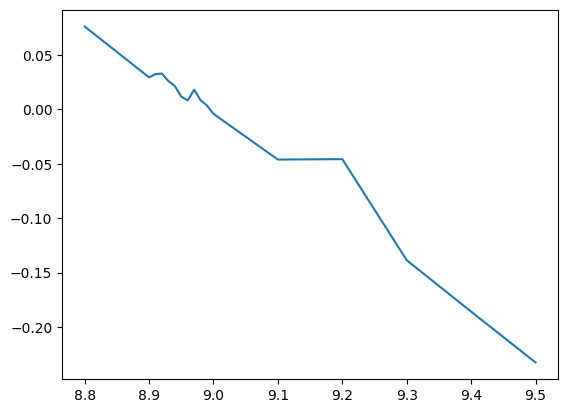

In [54]:
fig, ax = plt.subplots()
ax.plot(df100['q1'], df100['Q'])
# df

[3.63133755 0.85999448 0.94941072]


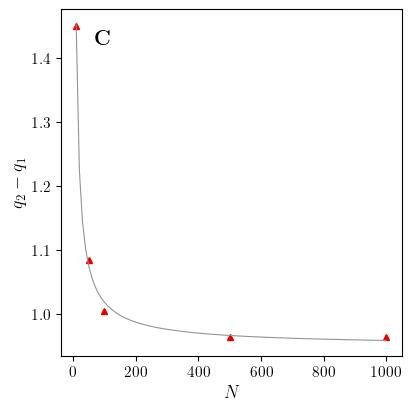

In [126]:
Ns = [10, 50, 100, 500, 1000]
q1s = [8.55,8.915,8.995,9.035, 9.035]
deltaq = [10-q1 for q1 in q1s]

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel='$N$', ylabel=r'$q_2 - q_1$')
ax.plot(Ns, deltaq, lw=0.0, marker='^', markersize=5, color='xkcd:red')

# fit 
def func(N, a, b, z):
    return z + a*N**(-b)

popt, pcov = curve_fit(func, Ns, deltaq)
print(popt)
Ns_more = np.linspace(10,1000, 100)
ax.plot(Ns_more, func(Ns_more, *popt), lw=0.8, color='xkcd:gray')
ax.text(0.10,0.9, r'$\textbf{C}$', transform=ax.transAxes)

fig.savefig('weber_law_qdif_system_size.pdf')

In [127]:
compute_R_sq(func, popt, Ns, deltaq)

0.9980654421747583

### q1,q2 with Q=0 for l=0.6, pi1=pi2=0.1
<p> [(9.048399633204996, 10), (13.636363636363921, 15), (18.2219035047404, 20), (22.806527208183123, 25), (27.39070710669751, 30), (31.974638522531812, 35), (36.55841684071821, 40), (41.14209416953, 45), (45.725701381520054, 50), (50.309257930220596, 55), (54.892776682444165, 60), (59.4762664883274, 65)]</p>

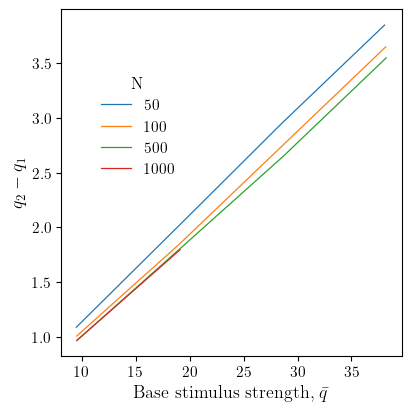

In [131]:
Ns_qpairs = {
    50:[(8.915,10.0), (17.985,20.0), (27.05,30.0), (36.15,40.0)], # es pot millorar el de 20.0,30.0, baixar un ordre de magnitud a 40.0
    100:[(8.995,10.0), (18.15,20.0), (27.25,30.0), (36.35,40.0)],
    500:[(9.035,10.0), (18.195,20.0), (27.35,30.0), (36.45,40.0)],
    1000:[(9.035,10.0), (18.205,20.0), ]
}

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel=r'$q_2 - q_1$')

for N,qpairs in Ns_qpairs.items():
    deltaq = [q2-q1 for q1,q2 in qpairs]
    bss= [(q2+q1)/2 for q1,q2 in qpairs]
    ax.plot(bss, deltaq, label=N, lw=0.9)
ax.legend(title='N', frameon=False, loc=(0.1, 0.5), fontsize=11, title_fontsize=12)